In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from hdbscan import HDBSCAN

In [2]:
file_path = "Mall_Customers.csv"
df = pd.read_csv(file_path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df = df.drop('CustomerID',axis=1)
df = df.dropna()

In [5]:
ohe = OneHotEncoder(sparse_output=False,handle_unknown='ignore').set_output(transform="pandas")
enc_d = ohe.fit_transform(df[['Gender']])
df = pd.concat([df.drop(['Gender'],axis=1),enc_d],axis=1)

In [6]:
df = df[['Annual Income (k$)','Spending Score (1-100)']]

In [7]:
X = StandardScaler().fit_transform(df)

In [8]:
hdbs = HDBSCAN(min_samples=None,min_cluster_size=10,metric='euclidean')

In [9]:
df['cluster'] = hdbs.fit_predict(X)

In [10]:
df['cluster'].value_counts()

cluster
 1    93
-1    63
 2    24
 0    20
Name: count, dtype: int64

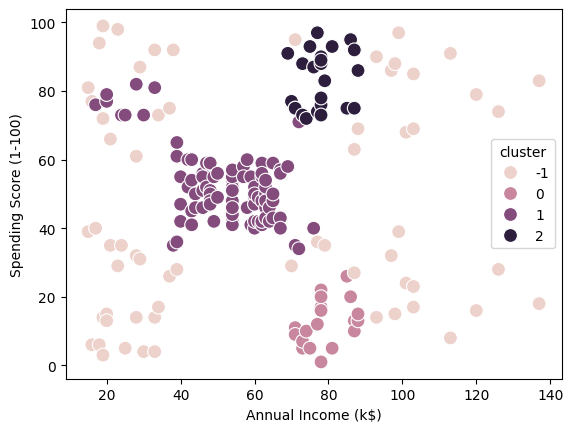

In [12]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='cluster',s=100)
plt.show()